# Set up

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(parent_dir, 'data')
models_dir = os.path.join(parent_dir, 'models')
for dir in [parent_dir, data_dir, models_dir]:
    os.makedirs(dir, exist_ok=True)
print('working directory: ', os.getcwd())
print('data directory:    ', data_dir, )
print('models directory:  ', models_dir)

working directory:  /Volumes/Datahouse/Users/Stipe/Documents/Studium/Master VWL/5 WS 2017/Seminar Information Systems/InformationSystemsWS1718/notebooks
data directory:     /Volumes/Datahouse/Users/Stipe/Documents/Studium/Master VWL/5 WS 2017/Seminar Information Systems/InformationSystemsWS1718/data
models directory:   /Volumes/Datahouse/Users/Stipe/Documents/Studium/Master VWL/5 WS 2017/Seminar Information Systems/InformationSystemsWS1718/models


# Data preparation

In [74]:
data_candidates = pd.read_csv(os.path.join(data_dir, 'fb_election_data_28112017.csv'))
data_candidates = data_candidates[['id', 'from_name', 'message', 'type', 'Partei_ABK']] # drop other columns
#data_party['message'] = data_party['message'].astype(str)

In [7]:
party_names = {'AfD': 'AfD',
               'DIE LINKE': 'DIE LINKE',
               'BÜNDNIS 90/DIE GRÜNEN': 'GRÜNE',
               'CSU (Christlich-Soziale Union)': 'CSU',
               'CDU': 'CDU',
               'FDP': 'FDP',
               'SPD': 'SPD'}
data_parties =  pd.read_csv((os.path.join(data_dir, 'party_data.csv')))
data_parties['Partei_ABK'] = data_parties['from_name'].map(party_names)
data_parties['from_name'] = data_parties['Partei_ABK'] + ' Party'
data_parties = data_parties[['id', 'from_name', 'message', 'Partei_ABK']] # drop other columns

In [62]:
data = data_candidates.append(data_parties)
data = data[data['message'].notnull()] # filter out empty posts
data.index = pd.Index(range(len(data)))  # make sure the index are unique increasing numbers
data.to_pickle(os.path.join(data_dir, 'data_clean_4cols.pickle'))  # save the data as pickle for faster loading
# data = pd.read_pickle(os.path.join(data_dir, 'data_clean_4cols.pickle'))  # data can be read  like this

# Inspect the data

In [64]:
data_candidates['word_count'] = data_candidates['message'].str.count(' ') + 1

In [55]:
# take a peek a the data
pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 1000)
data[data['from_name'] == 'Angela Merkel']

,Partei_ABK,from_name,id,message,type
95280,CDU,Angela Merkel,59788447049_10154103783382050,"Heute wäre Konrad Adenauer, der erste Bundeskanzler der Bundesrepublik Deutschland, 141 Jahre alt geworden. Ein Zitat von Konrad Adenauer, das mich bis heute leitet: „Die Einheit Europas war ein Traum weniger. Sie wurde eine Hoffnung für viele. Sie ist heute eine Notwendigkeit für alle.“ /am",status
95281,CDU,Angela Merkel,59788447049_10154119970482050,"Zum Tod von Roman Herzog: „Seine unverwechselbare kluge Stimme und seine Fähigkeit, Probleme offen zu benennen und dabei Mut zu machen, wird mir und wird uns allen fehlen. Die Nachricht von seinem Tod erfüllt mich mit tiefer Trauer.“ /Redaktion",photo
95282,CDU,Angela Merkel,59788447049_10154126641077050,Foto: Laurence Chaperon,photo
95283,CDU,Angela Merkel,59788447049_10154130270107050,Live aus dem Saarland: Angela Merkel zum Auftakt der CDU-Bundesvorstandsklausur /Redaktion,video
95284,CDU,Angela Merkel,59788447049_10154132050717050,"Angela Merkel und Annegret Kramp-Karrenbauer, Ministerpräsidentin des Saarlandes, beim Neujahrsempfang der CDU Saar in Saarlouis. #cdukt17 /Redaktion",video
95285,CDU,Angela Merkel,59788447049_10154132053042050,Live aus dem Saarland: Angela Merkel zum Abschluss der CDU-Bundesvorstandsklausur /Redaktion,video
95286,CDU,Angela Merkel,59788447049_10154132324917050,"„Es gibt Zeiten, in denen Weichen gestellt werden. In denen man sich vergewissern muss, was die Prinzipien sind, nach denen wir unsere Zukunft gestalten. Ich bin überzeugt, wir leben wieder in einer solchen Zeit.“ /am\n \nDer Bundesvorstand der CDU stellt die Weichen für eine gute Zukunft Deutschlands. Bei seiner Klausur im saarländischen Perl diskutierte und verabschiedete der Vorstand Beschlüsse zur inneren Sicherheit, für die Stärkung des gesellschaftlichen Zusammenhaltes und für die Sicherung der Grundlagen unseres Wohlstandes. #cdukt17",status
95287,CDU,Angela Merkel,59788447049_10154872056394820,Saarländische Erklärung: Für eine gute Zukunft Deutschlands: Wohlstand sichern. Zusammenhalt stärken.,status
95288,CDU,Angela Merkel,59788447049_10154132781337050,Angela Merkel im CDU.TV-Interview zur Bundesvorstandsklausur #cdukt17 /Redaktion,video
95289,CDU,Angela Merkel,59788447049_10154139877687050,"Herzlichen Glückwunsch zum 70. Geburtstag, Junge Union Deutschlands! /am",status


# Descriptive statistics

In [71]:
leaders = ['Sahra Wagenknecht',
'Dietmar Bartsch',
'Katrin Göring-Eckardt',
'Cem Özdemir',
'Martin Schulz',
'Angela Merkel',
'Joachim Herrmann',
'Alexander Gauland',
'Alice Weidel']
#data_candidates['leader'] = data_candidates['from_name'].isin(leaders)

In [76]:
data_candidates['word_count'] = data_candidates['message'].str.count(' ') + 1
candidate_summary = pd.DataFrame()
candidate_summary = (data_candidates
                  .drop(['id', 'message', 'word_count', 'type'], axis=1)
                  .drop_duplicates('from_name')
                  .set_index('from_name'))
candidate_summary['leader'] = candidate_summary.index.isin(leaders)
candidate_summary['mean_word_count'] = data_candidates.groupby('from_name')['word_count'].mean().round(2)
candidate_summary['median_word_count'] = data_candidates.groupby('from_name')['word_count'].median()
candidate_summary['post_count'] = data_candidates['from_name'].value_counts()
candidate_summary['total_words'] =  data_candidates.groupby('from_name')['word_count'].sum()
candidate_summary.shape

(1004, 6)

In [77]:
candidate_summary[candidate_summary['leader']].sort_values('Partei_ABK')
candidate_summary[candidate_summary['Partei_ABK'] == 'GRÜNE'].sort_values('post_count', ascending=False)
#candidate_data.sort_values('post_count', ascending=False)

,Partei_ABK,leader,mean_word_count,median_word_count,post_count,total_words
from_name,,,,,,
Memet Kilic,GRÜNE,False,29.68,25.0,571,16592.0
Roland Panter,GRÜNE,False,34.44,21.0,545,15704.0
Tabea Rößner,GRÜNE,False,28.81,18.0,489,13252.0
Julia Verlinden,GRÜNE,False,36.38,29.0,483,13932.0
Kai Gehring,GRÜNE,False,33.96,29.0,480,15147.0
Anton Hofreiter,GRÜNE,False,37.49,32.0,465,15707.0
Renate Künast,GRÜNE,False,33.23,30.0,456,13691.0
Özcan Mutlu,GRÜNE,False,29.71,22.0,443,12746.0
Jürgen Trittin,GRÜNE,False,34.13,27.0,408,12798.0


In [138]:
party_summary = pd.DataFrame()
party_summary['words_per_post'] = data_candidates.groupby('Partei_ABK')['word_count'].mean()
party_summary['word_count'] = data_candidates.groupby('Partei_ABK')['word_count'].sum()
party_summary['post_count'] = data_candidates['Partei_ABK'].value_counts()
party_summary['candidate_count'] = candidate_summary['Partei_ABK'].value_counts()
party_summary['posts_per_candidate'] = party_summary['post_count'] / party_summary['candidate_count']
party_summary['words_per_candidate'] = party_summary['word_count'] / party_summary['candidate_count']
party_summary.reset_index(inplace=True)

In [139]:
party_summary

,Partei_ABK,words_per_post,word_count,post_count,candidate_count,posts_per_candidate,words_per_candidate
0,AfD,68.173439,1113954.0,20211,124,162.991935,8983.500000
1,CDU,43.353218,1701267.0,42807,209,204.818182,8140.033493
2,CSU,37.378655,285087.0,8614,45,191.422222,6335.266667
3,DIE LINKE,62.494820,1001417.0,19520,110,177.454545,9103.790909
4,FDP,35.287935,751386.0,25737,173,148.768786,4343.271676
5,GRÜNE,39.506401,570907.0,16436,94,174.851064,6073.478723
6,SPD,40.526667,2390506.0,65112,249,261.493976,9600.425703


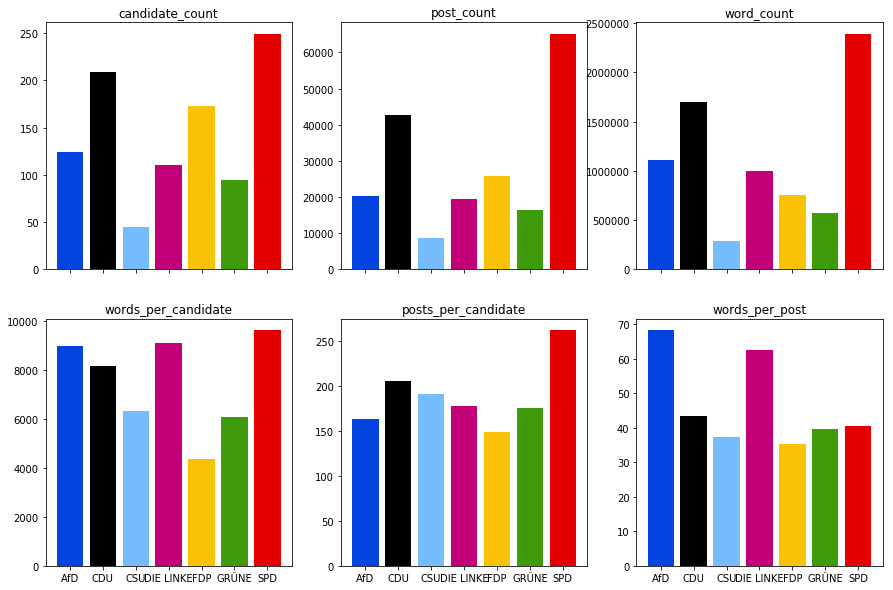

In [140]:
party_colors = {'AfD': 'xkcd:blue',
                'DIE LINKE': 'xkcd:magenta',
                'GRÜNE': 'xkcd:grass green',
                'CSU': 'xkcd:sky blue',
                'CDU': 'xkcd:black',
                'FDP': 'xkcd:goldenrod',
                'SPD': 'xkcd:red'}
f, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
axes[0, 0].bar(party_summary['Partei_ABK'],
        party_summary['candidate_count'],
        color=party_summary['Partei_ABK'].map(party_colors))
axes[0, 0].set_title('candidate_count')

axes[0, 1].bar(party_summary['Partei_ABK'],
        party_summary['post_count'],
        color=party_summary['Partei_ABK'].map(party_colors))
axes[0, 1].set_title('post_count')

axes[0, 2].bar(party_summary['Partei_ABK'],
        party_summary['word_count'],
        color=party_summary['Partei_ABK'].map(party_colors))
axes[0, 2].set_title('word_count')

axes[1, 0].bar(party_summary['Partei_ABK'],
        party_summary['words_per_candidate'],
        color=party_summary['Partei_ABK'].map(party_colors))
axes[1, 0].set_title('words_per_candidate')

axes[1, 1].bar(party_summary['Partei_ABK'],
        party_summary['posts_per_candidate'],
        color=party_summary['Partei_ABK'].map(party_colors))
axes[1, 1].set_title('posts_per_candidate')

axes[1, 2].bar(party_summary['Partei_ABK'],
        party_summary['words_per_post'],
        color=party_summary['Partei_ABK'].map(party_colors))
axes[1, 2].set_title('words_per_post')

plt.show()

In [27]:
post_summary = pd.DataFrame()
post_summary['mean_word_count'] = data_candidates.groupby('type')['word_count'].mean()
post_summary['post_count'] = data_candidates['type'].value_counts()
post_summary

,mean_word_count,post_count
type,,
album,2.000000,1
event,50.674707,6711
link,43.302055,41466
music,38.521739,23
note,39.075758,93
photo,45.770502,120072
status,75.462191,6921
video,31.357587,23150


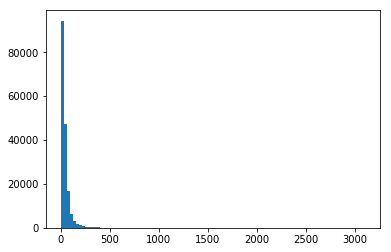

In [90]:
plt.figure()
n, bins, patches = plt.hist(x=data['word_count'], bins=100)
plt.show()

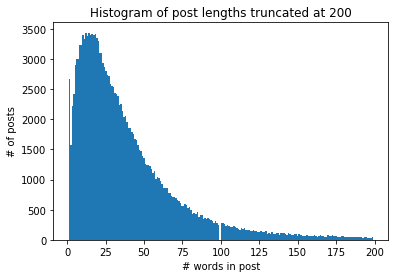

In [101]:
plt.figure()
n, bins, patches = plt.hist(x=data['word_count'][data['word_count']<200], bins=200)
plt.xlabel('# words in post')
plt.ylabel('# of posts')
plt.title('Histogram of post lengths truncated at 200')
plt.show()